In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [5]:
#import dataset
df = pd.read_csv('matches.csv')
#head of the dataset
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#shape of dataset, check how many rows and columns in dataset
df.shape

(756, 18)

In [8]:
#check total null value in dataset
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#after checking null value, umpire3 is 637 null value out of 756, so It's not good, we've few way to solve this problem like we can get mode of column, and replace in null values. Second method is drop the column.
#drop umpire3 column
df_update = df.drop(['umpire3'], axis=1)

In [10]:
#using mode
df_up = df_update.fillna(df.mode().iloc[0])

In [11]:
#Check who is max winner team 
df_up['winner'].value_counts().idxmax()

'Mumbai Indians'

In [12]:
#Check who is min winner team 
df_up['winner'].value_counts().idxmin()

'Rising Pune Supergiants'

In [14]:
#check season winner 
t_season = df_up.groupby('season')['winner'].value_counts()
print(t_season)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64


In [15]:
#check which team win max season
year = 2008
w_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in t_season.iteritems():
    if items[0][0] == year:
        print(items)
        w_series = pd.DataFrame({'year':[items[0][0]], 'team': [items[0][1]], 'wins':[items[1]]})
        w_season = w_season.append(w_series)
        
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Mumbai Indians'), 12)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 12)


In [17]:
#check cities and which team wins
w_city = df_up.groupby('city')['winner'].value_counts()
print(w_city)

city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Delhi Capitals             1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 211, dtype: int64


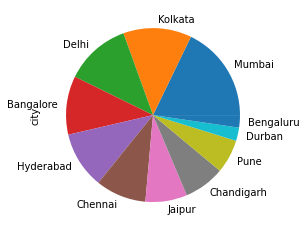

In [19]:
#check max matches played
df_up['city'].value_counts().head(11).plot.pie()

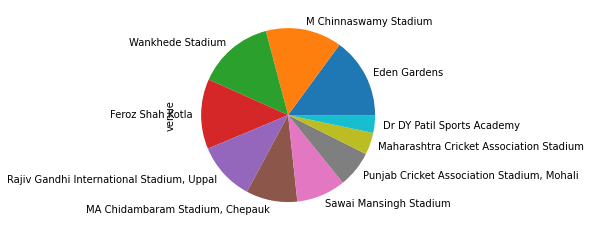

In [21]:
#where stadium max matches played
df_up['venue'].value_counts().head(10).plot.pie()

In [22]:
#where stadium max matches played
df_up['venue'].value_counts().head(10)

Eden Gardens                                  77
M Chinnaswamy Stadium                         73
Wankhede Stadium                              73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

In [26]:
#which team win max matches
team = df_up['winner'].value_counts()

team_w = pd.DataFrame(columns=["team", "wins"])
for items in team.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_w = team_w.append(temp_df1, ignore_index=True)

In [27]:
team_w

,team,wins
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [28]:
#check player win match awards
player = df_up['player_of_match'].value_counts()

player_w = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in player.iteritems():
    if count>9:
        break
    else:
        t = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        player_w = player_w.append(t, ignore_index=True)
        count += 1
        
player_w

,player,wins
0,CH Gayle,25
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


In [29]:
win_count = 0
for index, value in df_up.iterrows():
    if(value['toss_winner']==value['winner']):

        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df_up)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


In [30]:
#which team win max toss
toss = df_up['toss_winner'].value_counts()

toss_w = pd.DataFrame(columns=["team", "wins"])

for items in toss.iteritems():
    t = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_w = toss_w.append(t, ignore_index=True)
    
toss_w

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


In [32]:
#Deliveries Dataset import
de = pd.read_csv('deliveries.csv')
de.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
#how many rows and column
de.shape

(179078, 21)

In [34]:
#check info
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [35]:
#extra runs
sum(de['extra_runs'])

12004

In [36]:
#total NoBall runs
sum(de['noball_runs'])

749

In [37]:
#super over
de['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [38]:
#dismissal
de['player_dismissed'].value_counts()

SK Raina            162
RG Sharma           155
RV Uthappa          153
V Kohli             143
S Dhawan            137
                   ... 
N Naik                1
JE Taylor             1
Y Gnaneswara Rao      1
M Wood                1
S Lamichhane          1
Name: player_dismissed, Length: 487, dtype: int64

In [39]:
#sum of dismissal player
sum(de['player_dismissed'].value_counts())

8834

In [41]:
#penalty runs
sum(de['penalty_runs'])

10

In [45]:
#which team win max toss
run = de['batsman'].value_counts()

run_b = pd.DataFrame(columns=["batsman", "batsman_runs"])

for items in run.iteritems():
    t = pd.DataFrame({
        'batsman':[items[0]],
        'batsman_runs':[items[1]]
    })
    run_b = run_b.append(t, ignore_index=True)
    
run_b

,batsman,batsman_runs
0,V Kohli,4211
1,SK Raina,4044
2,RG Sharma,3816
3,S Dhawan,3776
4,G Gambhir,3524
...,...,...
511,C Nanda,1
512,Sunny Gupta,1
513,P Raj,1
514,LH Ferguson,1


In [47]:
#after analysis the dataset
# CH Gayles wins max player of match award
# Maximum Matches played in Eden Garden Stadium
# Mumbai Indian win maximum seasons
# extra runs in deliveries 12004